In [52]:
#ChatGPT: https://chat.openai.com/share/f4c5d2a5-99e9-4994-90de-be964644976e

# !pip install GNews

# !pip install newspaper3k

Enter a topic you're interested in (or type 'done' when finished): apple
Enter a topic you're interested in (or type 'done' when finished): tech
Enter a topic you're interested in (or type 'done' when finished): done
You are interested in the following topics:
- apple
- tech


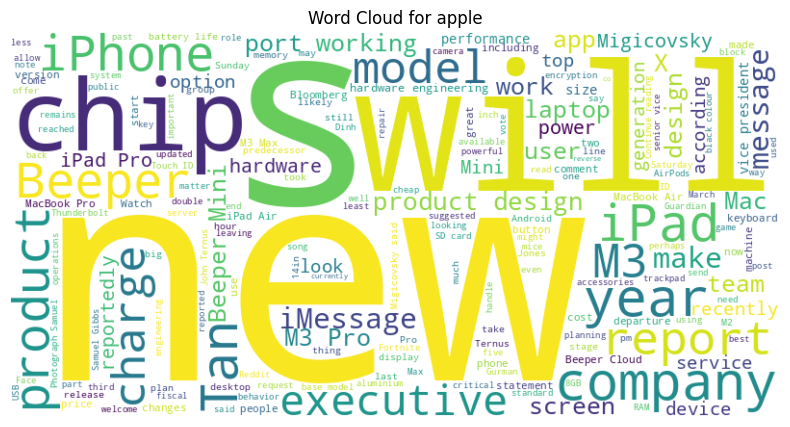

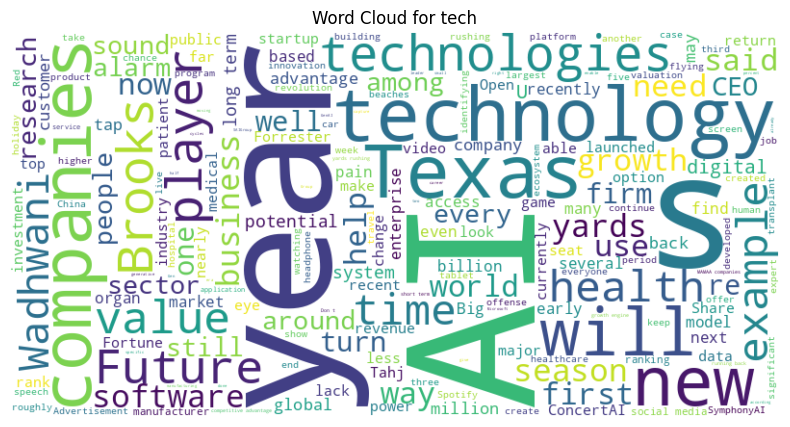


Average Sentiment Across Topics:
Topic
apple    0.110449
tech     0.104373
Name: Sentiment, dtype: float64


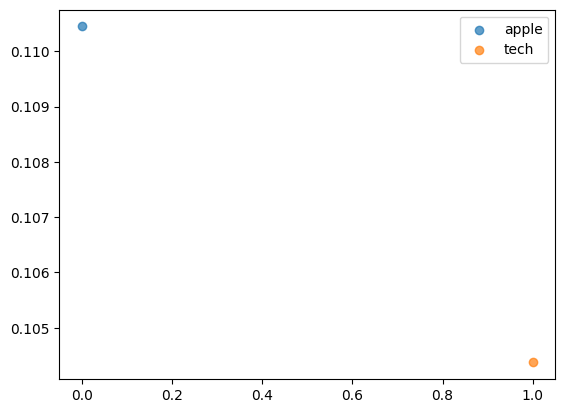

In [69]:
from gnews import GNews
from newspaper import Article
from textblob import TextBlob
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

from newspaper import Config

user_agent = 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36'
config = Config()
config.browser_user_agent = user_agent


# Function to ask the user for a list of topics
def get_user_topics():
    topics = []

    while True:
        topic = input("Enter a topic you're interested in (or type 'done' when finished): ")
        if topic.lower() == 'done':
            break
        else:
          topics.append(topic)

    return topics

# Function to scrape Google News for articles on a given topic
def scrape_google_news(topic):
    news_client = GNews()
    articles = news_client.get_news(topic)
    return articles

# Function to extract text from an article using newspaper library
def extract_text(article_url):
    article = Article(article_url)
    article.download()
    article.parse()
    return article.text

# Function to conduct sentiment analysis on a given text
def analyze_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

# Function to create a word cloud from a given text
def generate_word_cloud(text, topic):
    # Add the topic word to the stopwords
    custom_stopwords = set(STOPWORDS)
    custom_stopwords.add(topic.lower())

    wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=custom_stopwords).generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {topic}')
    plt.show()

# List to store the results
results = []

# Ask the user for topics
user_topics = get_user_topics()

# Print the list of topics
print("You are interested in the following topics:")
for topic in user_topics:
    print(f"- {topic}")

# Iterate through user-selected topics
for topic in user_topics:
    text = ''
    # Scrape Google News for articles
    articles = scrape_google_news(topic)
    # Extract text, conduct sentiment analysis, and generate word cloud for each article
    for article in articles[:10]:
        try:
          text += extract_text(article['url'])
        except:
          pass




    # Generate word cloud for the article text
    generate_word_cloud(text, topic)
    sentiment_score = analyze_sentiment(text)
    # Append results to the list
    results.append({
        'Topic': topic,
        'Title': article['title'],
        'Sentiment': sentiment_score
    })

# Convert results to a DataFrame for further analysis or visualization
df_results = pd.DataFrame(results)
for topic in user_topics:
    topic_df = df_results[df_results['Topic'] == topic]
    plt.scatter(topic_df.index, topic_df['Sentiment'], label=topic, alpha=0.7)
    plt.legend()



# Answer a creative question (e.g., comparing average sentiment across topics)
average_sentiment_by_topic = df_results.groupby('Topic')['Sentiment'].mean()
print("\nAverage Sentiment Across Topics:")
print(average_sentiment_by_topic)